In [32]:
# Data Analysis

import numpy as np
import pandas as pd
from pandas import datetime

# Data Visualisation

import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt

# Data Prediction
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn import preprocessing
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from statsmodels.tsa.arima_model import ARIMA, ARMA, AR
from statsmodels.tsa.vector_ar.var_model import VAR

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Data Extraction

df = pd.read_csv('data.csv')
df.head(10)

,house_pk,agency_id,date_in,price,dis_water_real,dis_shopping,no_bedrooms,max_persons,house_size,land_size,build_year,renovation_year,apartment,indoor_pool,spa,internet,pets_allowed,water_view,fire_stove,agency_rating
0,84561,90,2016-08-27,532,0.261,3.0,3,4,140,726,1953,2014,0,0,1,1,0,1,1,3.0
1,84561,90,2016-08-26,588,0.261,3.0,3,4,140,726,1953,2014,0,0,1,1,0,1,1,3.0
2,84561,90,2016-08-25,588,0.261,3.0,3,4,140,726,1953,2014,0,0,1,1,0,1,1,3.0
3,84561,90,2016-08-24,588,0.261,3.0,3,4,140,726,1953,2014,0,0,1,1,0,1,1,3.0
4,84561,90,2016-08-23,588,0.261,3.0,3,4,140,726,1953,2014,0,0,1,1,0,1,1,3.0
5,84561,90,2016-08-22,588,0.261,3.0,3,4,140,726,1953,2014,0,0,1,1,0,1,1,3.0
6,84561,90,2016-08-21,588,0.261,3.0,3,4,140,726,1953,2014,0,0,1,1,0,1,1,3.0
7,84561,90,2016-08-20,588,0.261,3.0,3,4,140,726,1953,2014,0,0,1,1,0,1,1,3.0
8,84561,90,2016-08-19,672,0.261,3.0,3,4,140,726,1953,2014,0,0,1,1,0,1,1,3.0
9,84561,90,2016-08-18,672,0.261,3.0,3,4,140,726,1953,2014,0,0,1,1,0,1,1,3.0


In [48]:
print(df.shape)
#check the dtypes
df.dtypes

(85195, 28)


house_pk             int64
agency_id            int64
price                int64
dis_water_real     float64
dis_shopping       float64
no_bedrooms          int64
max_persons          int64
house_size           int64
land_size            int64
build_year           int64
renovation_year      int64
apartment            int64
indoor_pool          int64
spa                  int64
internet             int64
pets_allowed         int64
water_view           int64
fire_stove           int64
agency_rating      float64
priceLog           float64
Year                 int64
Month                int64
Day                  int64
WeekOfYear           int64
RenovationDiffn      int64
PeopleInRoom       float64
day_of_week         object
day_week             int64
dtype: object

In [4]:
df['date_in'] = pd.to_datetime(df['date_in'])
df = df.set_index('date_in')

In [5]:
# Missing Values

## Null Counting Fucntion
def null_values(df):
    
    sum_null = df.isnull().sum()
    total = df.isnull().count()
    percent_nullvalues = 100* sum_null / total 
    df_null = pd.DataFrame()
    df_null['Total'] = total
    df_null['Null_Count'] = sum_null
    df_null['Percent'] = round(percent_nullvalues,2)
    df_null = df_null.sort_values(by='Null_Count',ascending = False)
    df_null = df_null[df_null.Null_Count > 0]
    
    return(df_null)

null_values(df)

,Total,Null_Count,Percent


In [6]:
corr = df.corr().abs()
corr.price[corr.price >= 0.5].sort_values(ascending=False)

price    1.0
Name: price, dtype: float64

In [50]:
df['price'].describe()

count    85195.000000
mean       560.170879
std        312.439706
min         28.000000
25%        336.000000
50%        455.000000
75%        700.000000
max       2688.000000
Name: price, dtype: float64

In [51]:
df['price'].median()

455.0

Text(0.5,1,'Price')

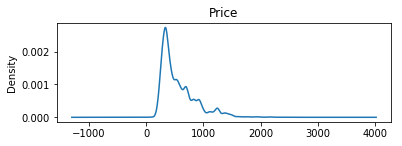

In [7]:
# If the mean > median that means the data is right skewed
# By log tranformation, right skewed distribution can be a normal form


# Distribution plot of Price
plt.subplot2grid((2,1),(0,0))
df.price.plot(kind='kde')
plt.title('Price')

Text(0.5,1,'LogPrice')

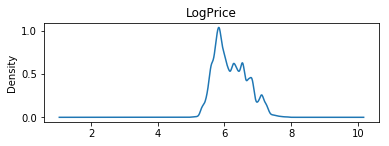

In [8]:
# Addind feature log price
df['priceLog'] = np.log(df.price)

# Distribution Plot for log price 
plt.subplot2grid((2,1),(0,0))
df.priceLog.plot(kind='kde')
plt.title('LogPrice')

In [37]:
# Feature extraction


df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['WeekOfYear'] = df.index.weekofyear
df['RenovationDiffn'] = df['renovation_year'] - df['build_year'] 
df['PeopleInRoom'] = df['max_persons']/df['no_bedrooms'] 
df['day_of_week'] = df.index.day_name()
df['day_week'] = df.index.dayofweek

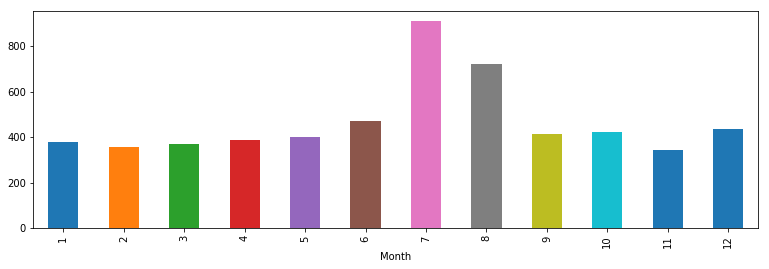

In [11]:
# Plotting Graphs to see the realtionship between features and price
df.groupby('Month')['price'].median().plot(kind='bar',figsize=(13,4))


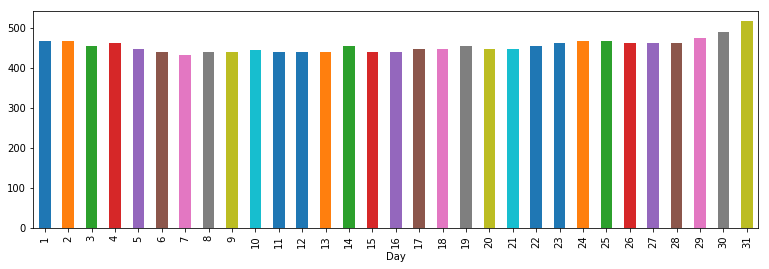

In [12]:
df.groupby('Day')['price'].median().plot(kind='bar',figsize=(13,4))

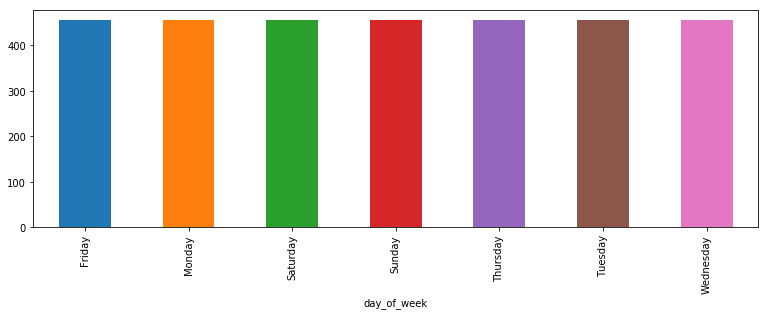

In [13]:
df.groupby('day_of_week')['price'].median().plot(kind='bar',figsize=(13,4))


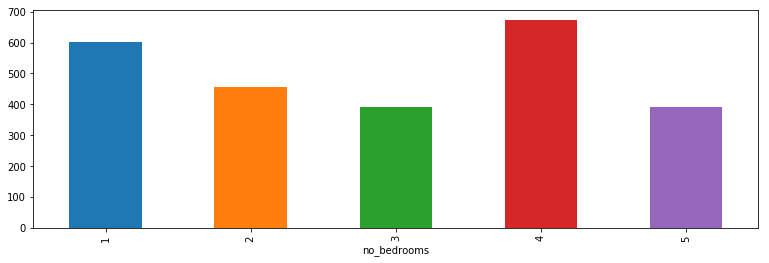

In [14]:
df.groupby('no_bedrooms')['price'].median().plot(kind='bar',figsize=(13,4))

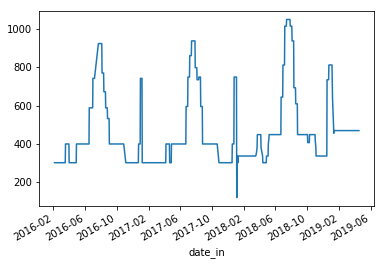

In [15]:
df1= (df.loc[df['house_pk'].isin([84561])])
df1['price'].plot()    

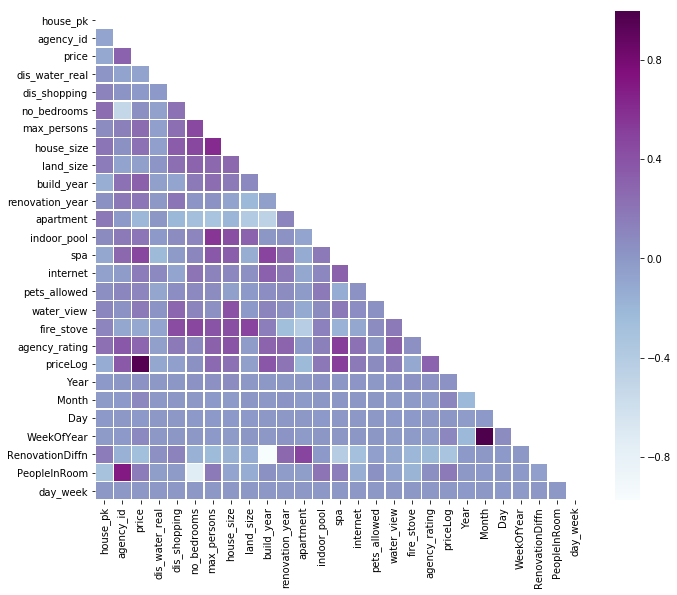

In [38]:
# Computing the correlation matrix 
corr_all = df.corr()

# Mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Heatmap with the mask and correct aspect ratio
f, ax = plt.subplots(figsize = (11, 9))
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()

In [39]:
# Creating X and Y
y = df['priceLog']
X = df.drop(['price','house_pk','day_of_week','Month','priceLog'], axis=1)

# Splitting the training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.80,random_state=0)

In [40]:
# Selecting the best parameter for our  Xgboost Model

#booster = xgb.XGBRegressor()

# create Grid
#param_grid = {'n_estimators': [100, 150, 200, 2000],
 #             'learning_rate': [0.01, 0.05, 0.1], 
  #            'max_depth': [3, 4, 5, 6, 7],
   #           'colsample_bytree': [0.6, 0.7, 1],
    #          'gamma': [0.0, 0.1, 0.2]}

# instantiate the tuned random forest

#booster_grid_search = GridSearchCV(booster, param_grid, cv=3, n_jobs=-1)

# train the tuned random forest
#booster_grid_search.fit(X_train, y_train)

# print best estimator parameters found during the grid search
#print(booster_grid_search.best_params_)

# instantiate xgboost with best parameters
booster = xgb.XGBRegressor(colsample_bytree=0.8, gamma=0.01, learning_rate=0.05, 
                           max_depth=7, n_estimators=2000, 
                           random_state=4, silent=1, reg_lambda=0.3,
                           nthread = -1,min_child_weight=1.8,subsample=0.5,
                           reg_alpha=0.1)

#booster = xgb.XGBRegressor(colsample_bytree=1, gamma=0.0, learning_rate=0.1, 
#                          max_depth=7, n_estimators=2000, 
#                          random_state=4, silent=1, reg_lambda=0.3,
#                          nthread = -1,min_child_weight=1.8,subsample=0.5)


In [41]:
# Training
booster.fit(X_train, y_train)

#Training the Final Model

#booster.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.01, learning_rate=0.05,
       max_delta_step=0, max_depth=7, min_child_weight=1.8, missing=None,
       n_estimators=2000, n_jobs=1, nthread=-1, objective='reg:linear',
       random_state=4, reg_alpha=0.1, reg_lambda=0.3, scale_pos_weight=1,
       seed=None, silent=1, subsample=0.5)

In [42]:
# Predict
##y_pred_train = booster.predict(X_train)
y_pred_test = booster.predict(X_test)


In [44]:
# Printing the results

print("Validation RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred_test)),4))
print("Validation MSE:", round(mean_squared_error(y_test, y_pred_test),4))
print("Validation r2:", round(r2_score(y_test, y_pred_test),4))

Validation RMSE: 0.0888
Validation MSE: 0.0079
Validation r2: 0.9675


In [45]:
# Converting Log Price to Real Price

np.exp(y_pred_test)
np.exp(y_test)

date_in
2017-11-29     644.0
2018-09-22     350.0
2016-01-24     322.0
2017-09-03     721.0
2018-12-13     518.0
2017-04-06     924.0
2018-08-11    1337.0
2016-12-29     448.0
2016-03-25     826.0
2018-12-10     434.0
2017-02-06     315.0
2016-10-18     490.0
2018-04-25     630.0
2016-03-29     518.0
2017-06-20     252.0
2018-09-11     217.0
2018-12-07     518.0
2016-06-21     301.0
2018-06-01     371.0
2016-05-24     350.0
2016-07-13     700.0
2017-09-03     294.0
2018-04-12     875.0
2018-07-05     609.0
2018-09-07     399.0
2016-05-14     231.0
2017-10-11     203.0
2016-12-22     392.0
2016-09-30     868.0
2018-02-11     420.0
               ...  
2016-11-12     273.0
2016-09-24     574.0
2019-03-05     357.0
2019-02-18     434.0
2018-06-22     581.0
2016-07-16    1190.0
2017-11-22     637.0
2017-11-24     273.0
2017-04-08     658.0
2018-10-23     385.0
2016-08-11     714.0
2018-07-25    1946.0
2017-07-29     882.0
2017-04-27     399.0
2017-03-18     350.0
2018-09-15     973.0
2017-

In [46]:
# Cross Validation 

kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(booster, X_train, y_train, cv=kfold)
print("Mean and Standard Deviation: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Mean and Standard Deviation: 96.40% (0.92%)


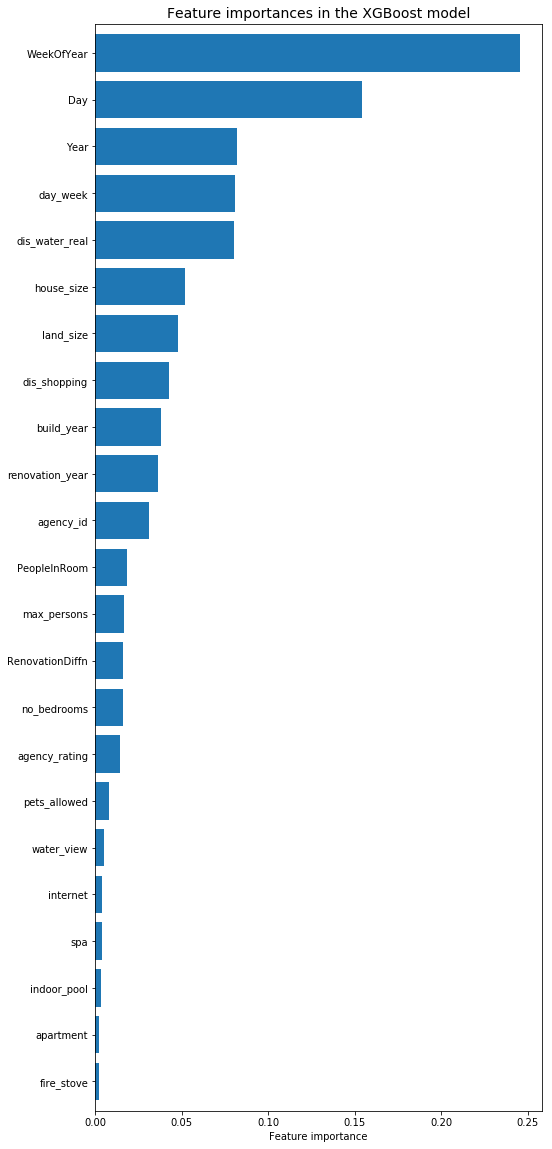

In [47]:
# Producing a dataframe of feature importances
ft_weights_xgb_reg = pd.DataFrame(booster.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)


# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

In [52]:
##################Final Model#####################

# All the values inside the dataset are now passed to our final model

#booster.fit(X, y)

# Preprocessing of the Test Data

#df1 = pd.read_csv('Test.csv')
#df1['date_in'] = pd.to_datetime(df1['date_in'])
#df1 = df1.set_index('date_in')
#df1['priceLog'] = np.log(df1.price)
#df1['Year'] = df1.index.year
#df1['Month'] = df1.index.month
#df1['Day'] = df1.index.day
#df1['WeekOfYear'] = df1.index.weekofyear
#df1['RenovationDiffn'] = df1['renovation_year'] - df1['build_year'] 
#df1['PeopleInRoom'] = df1['max_persons']/df1['no_bedrooms'] 
#df1['day_of_week'] = df1.index.day_name()
#df1['day_week'] = df1.index.dayofweek
#y1 = df1['priceLog']
#X1 = df1.drop(['price','house_pk','day_of_week','Month','priceLog'], axis=1)

# Making the Prediction

#y_pred_test1 = booster.predict(X1)

# Converting Log back to Actual Price

#np.exp(y_pred_test1)
#np.exp(y1)

# Final Results

#print("Validation RMSE:", round(np.sqrt(mean_squared_error(y1, y_pred_test1)),4))
#print("Validation MSE:", round(mean_squared_error(y1, y_pred_test1),4))
#print("Validation r2:", round(r2_score(y1, y_pred_test1),4))


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.01, learning_rate=0.05,
       max_delta_step=0, max_depth=7, min_child_weight=1.8, missing=None,
       n_estimators=2000, n_jobs=1, nthread=-1, objective='reg:linear',
       random_state=4, reg_alpha=0.1, reg_lambda=0.3, scale_pos_weight=1,
       seed=None, silent=1, subsample=0.5)

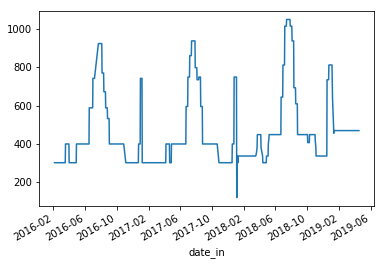

In [26]:
#########################Time series model################################ 

# This model is just build to see how well the time series will perform
#Only House_pk 84561 is taken for analysis
        
oyo= (df.loc[df['house_pk'].isin([84561])])
oyo['price'].plot()


In [27]:
oyo = oyo[['price']]
oyo.head(5)

,price
date_in,
2016-08-27,532
2016-08-26,588
2016-08-25,588
2016-08-24,588
2016-08-23,588


In [28]:
oyo = oyo.sort_values(by='date_in')
# Removing the duplicates
oyo = oyo[~oyo.index.duplicated()]

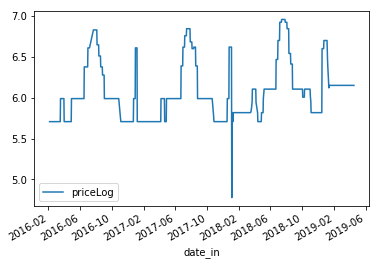

In [29]:
#Adding log prices
oyo['priceLog'] = np.log(oyo.price)

#Plotting the pct change and log return
oyo[['priceLog']].plot()

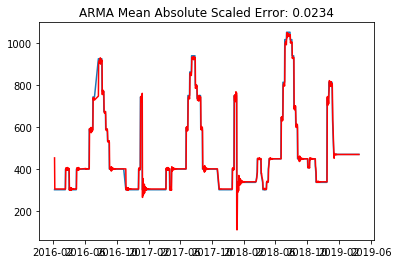

                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 1107
Model:                     ARMA(7, 2)   Log Likelihood               -5618.683
Method:                       css-mle   S.D. of innovations             38.675
Date:                Wed, 09 Oct 2019   AIC                          11259.367
Time:                        14:08:14   BIC                          11314.470
Sample:                             0   HQIC                         11280.206
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         452.3708     49.435      9.151      0.000     355.480     549.261
ar.L1.price    -0.4759      0.134     -3.544      0.000      -0.739      -0.213
ar.L2.price     0.7263      0.069     10.480    

In [34]:
#Use of ARMA Model
    
    
model = ARMA(oyo['price'], order=(7, 2)).fit()
plt.plot(oyo['price'])
plt.plot(model.fittedvalues, color='red')
plt.title('ARMA Mean Absolute Scaled Error: %.4f'% (sum(abs(model.resid) / oyo['price'].mean()) / oyo['price'].size))
plt.show()
print(model.summary())

In [36]:
#Prediction using Arima Model
X = oyo['price'].values
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(7,2,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 1094.350


In [53]:
########### Question 2###########

string = "5*11-2+248"
type(string)
print(eval(string))


301
